In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

iris_dataset = datasets.load_iris()
X = iris_dataset.data[:, :2] 
y = iris_dataset.target



Number of examples: 99


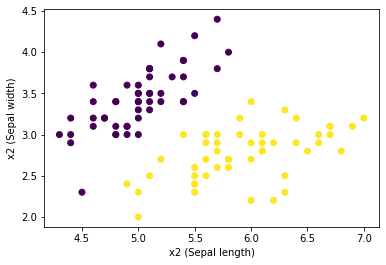

In [3]:
for c in range(len(y)):
    if y[c] == 2:
        break
y = y[:c-1]
X = X[:c-1,:]

print("Number of examples:", len(y))

# We can create a plot of the data as follows, where each class is printed in a different colour.
# As you'll see, the data are linearly separable and there are only two classes now.
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("x2 (Sepal length)")
plt.ylabel("x2 (Sepal width)")
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

print("Number of training examples:", len(y_train))
print("Number of test examples:", len(y_test))

Number of training examples: 66
Number of test examples: 33


In [5]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=3, solver='sag', penalty='none', max_iter=10000)
model = LR.fit(X_train, y_train)

The code for the plot was created based on the following code contributed by user mwaskom in StackOverflow: https://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression


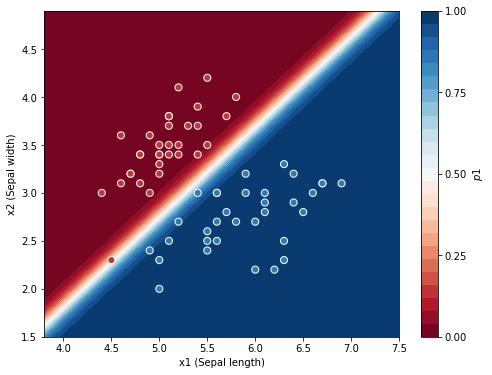

In [6]:
# Creating a fine grid of input values X. We will ask the model to provide predictions to all these examples.
# By doing that, we will know what probability is being associated to different regions of the space.

from numpy import mgrid
from numpy import linspace

# Set the minimum and maximum input values for the grid
x1_min, x1_max = X[:, 0].min() -0.5, X[:, 0].max() +0.5
x2_min, x2_max = X[:, 1].min() -0.5, X[:, 1].max() +0.5

# Generate grid_size equally spaced input values between the min and max values
x1_grid, x2_grid = np.mgrid[x1_min:x1_max:.01, x2_min:x2_max:.01]
#print(x1_grid)
#print(x2_grid)

# Place all the values of the x1 and x2 coordinates in an array with ravel
# Then create pairs of x1,x2 to generate the grid examples with c_
grid = np.c_[x1_grid.ravel(), x2_grid.ravel()]
#print(grid)

# Get the probabilities provided by the logistic regression model
probs = model.predict_proba(grid)[:, 1].reshape(x1_grid.shape)
#print(probs)

f, ax = plt.subplots(figsize=(8, 6))

# Plot the probability values for each grid example
contour = ax.contourf(x1_grid, x2_grid, probs, 25, cmap="RdBu") 

# Legend for the probability values
ax_c = f.colorbar(contour)
ax_c.set_label("$p1$")
ax_c.set_ticks([0, .25, .5, .75, 1])

# Plot training examples
ax.scatter(X_train[:,0], X_train[:, 1], c=y_train, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(x1_min, x1_max), ylim=(x2_min, x2_max),
       xlabel="x1 (Sepal length)", ylabel="x2 (Sepal width)");


In [7]:
def evaluate(predicted_labels, true_labels):
    
    accuracy = 0
    for i in range(len(true_labels)):
        if predicted_labels[i] == true_labels[i]:
            accuracy += 1
    accuracy /= len(true_labels)
    print("Accuracy:", accuracy)

In [8]:
predict_train = model.predict(X_train)
evaluate(predict_train, y_train)

Accuracy: 1.0


In [9]:
print("Accuracy on training examples:", model.score(X_train,y_train))
print("Accuracy on test examples:", model.score(X_test,y_test))

Accuracy on training examples: 1.0
Accuracy on test examples: 1.0


In [10]:
print("Weights w1 and w2: ", model.coef_)
print("Weight w0: ", model.intercept_)

Weights w1 and w2:  [[ 10.942229   -11.61972955]]
Weight w0:  [-22.93646547]
